# Import Necessary Libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
cocacola_data=pd.read_excel("./CocaCola_Sales_Rawdata.xlsx")
cocacola_data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


# Data Understanding

In [3]:
from datetime import datetime as dt

### Converting to Date-Time Format

In [4]:
cocacola_data['date'] = (
    pd.to_datetime(
        cocacola_data['Quarter'].str.split('_').apply(lambda x:''.join(x[::-1]))
))

In [5]:
cocacola_data['date'] = cocacola_data['date'] + pd.offsets.QuarterEnd(0)

In [6]:
cocacola_data['date'] = cocacola_data['date'].dt.strftime("%d-%m-%y")

In [7]:
cocacola_data['Date']=pd.to_datetime(cocacola_data['date'])

In [8]:
cocacola_data=cocacola_data.drop(["date"],axis=1)

In [9]:
cocacola_data.head(10)

,Quarter,Sales,Date
0,Q1_86,1734.827000,1986-03-31
1,Q2_86,2244.960999,1986-06-30
2,Q3_86,2533.804993,1986-09-30
3,Q4_86,2154.962997,1986-12-31
4,Q1_87,1547.818996,1987-03-31
5,Q2_87,2104.411995,1987-06-30
6,Q3_87,2014.362999,1987-09-30
7,Q4_87,1991.746998,1987-12-31
8,Q1_88,1869.049999,1988-03-31
9,Q2_88,2313.631996,1988-06-30


In [10]:
cocacola_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Quarter  42 non-null     object        
 1   Sales    42 non-null     float64       
 2   Date     42 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.1+ KB


In [11]:
cocacola_data.shape

(42, 3)

In [12]:
cocacola_data.dtypes

Quarter            object
Sales             float64
Date       datetime64[ns]
dtype: object

In [13]:
cocacola_data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<AxesSubplot:>

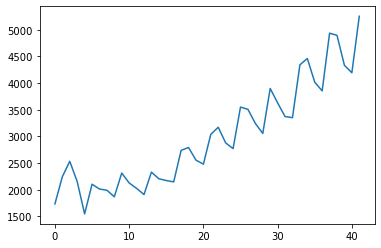

In [14]:
cocacola_data.Sales.plot()

# Data Preprocessing

In [15]:
cocacola_data["year"]=cocacola_data["Date"].dt.strftime('%y')

In [16]:
cocacola_data["month"]=cocacola_data["Date"].dt.strftime('%b')

In [17]:
cocacola_data.head()

,Quarter,Sales,Date,year,month
0,Q1_86,1734.827000,1986-03-31,86,Mar
1,Q2_86,2244.960999,1986-06-30,86,Jun
2,Q3_86,2533.804993,1986-09-30,86,Sep
3,Q4_86,2154.962997,1986-12-31,86,Dec
4,Q1_87,1547.818996,1987-03-31,87,Mar


In [18]:
dummy=(pd.get_dummies(data=cocacola_data["month"]))
dummy

,Dec,Jun,Mar,Sep
0,0,0,1,0
1,0,1,0,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
5,0,1,0,0
6,0,0,0,1
7,1,0,0,0
8,0,0,1,0
9,0,1,0,0


In [19]:
cocacola_data=pd.concat([cocacola_data ,dummy],axis=1)
cocacola_data.head()

,Quarter,Sales,Date,year,month,Dec,Jun,Mar,Sep
0,Q1_86,1734.827000,1986-03-31,86,Mar,0,0,1,0
1,Q2_86,2244.960999,1986-06-30,86,Jun,0,1,0,0
2,Q3_86,2533.804993,1986-09-30,86,Sep,0,0,0,1
3,Q4_86,2154.962997,1986-12-31,86,Dec,1,0,0,0
4,Q1_87,1547.818996,1987-03-31,87,Mar,0,0,1,0


In [20]:
t=np.arange(1,(cocacola_data.shape[0])+1,1)
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42])

In [21]:
t=pd.DataFrame(t)

In [22]:
t=t.rename({0:"t"},axis=1)
t

,t
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [23]:
cocacola_data["t"]=t
cocacola_data.head()

,Quarter,Sales,Date,year,month,Dec,Jun,Mar,Sep,t
0,Q1_86,1734.827000,1986-03-31,86,Mar,0,0,1,0,1
1,Q2_86,2244.960999,1986-06-30,86,Jun,0,1,0,0,2
2,Q3_86,2533.804993,1986-09-30,86,Sep,0,0,0,1,3
3,Q4_86,2154.962997,1986-12-31,86,Dec,1,0,0,0,4
4,Q1_87,1547.818996,1987-03-31,87,Mar,0,0,1,0,5


In [24]:
cocacola_data["log_sales"]=np.log(cocacola_data["Sales"])
cocacola_data["t_square"]=np.square(cocacola_data["t"])

In [25]:
cocacola_data.head()

,Quarter,Sales,Date,year,month,Dec,Jun,Mar,Sep,t,log_sales,t_square
0,Q1_86,1734.827000,1986-03-31,86,Mar,0,0,1,0,1,7.458663,1
1,Q2_86,2244.960999,1986-06-30,86,Jun,0,1,0,0,2,7.716443,4
2,Q3_86,2533.804993,1986-09-30,86,Sep,0,0,0,1,3,7.837477,9
3,Q4_86,2154.962997,1986-12-31,86,Dec,1,0,0,0,4,7.675529,16
4,Q1_87,1547.818996,1987-03-31,87,Mar,0,0,1,0,5,7.344602,25


### Visualisation

<AxesSubplot:>

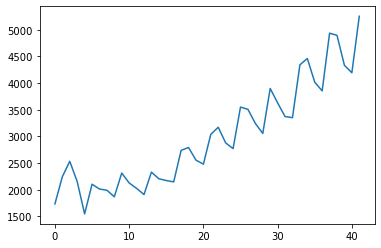

In [26]:
cocacola_data.Sales.plot()

####  Observation :  Plot shows Updard trend with no particular seasonality

### Distribution of sales data

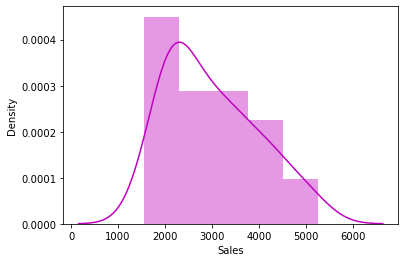

In [27]:
sns.distplot(cocacola_data["Sales"],color="m")
plt.show()

### Month wise sales distribution and  Year wise sales distribution

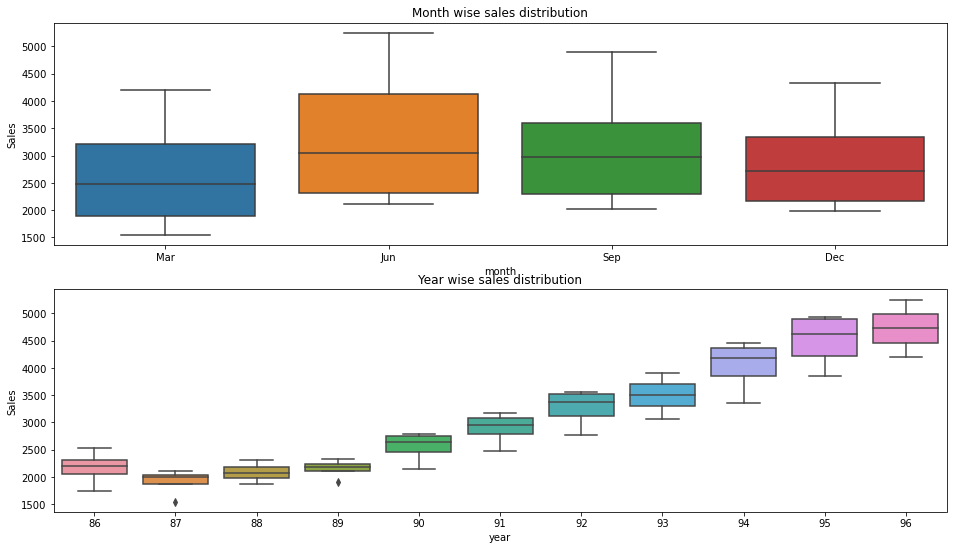

In [28]:
plt.figure(figsize=(16,9))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=cocacola_data)
plt.title("Month wise sales distribution")
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=cocacola_data)
plt.title("Year wise sales distribution")
plt.show()

### Line plot

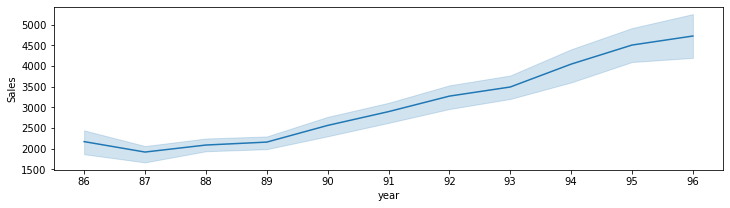

In [29]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=cocacola_data)
plt.show()

In [30]:
cocacola_data.head(2)

,Quarter,Sales,Date,year,month,Dec,Jun,Mar,Sep,t,log_sales,t_square
0,Q1_86,1734.827000,1986-03-31,86,Mar,0,0,1,0,1,7.458663,1
1,Q2_86,2244.960999,1986-06-30,86,Jun,0,1,0,0,2,7.716443,4


### Understanding year wise sales with Correlation matrix and Heatmap

In [31]:
pivot=pd.pivot_table(data=cocacola_data,values="Sales",index="month",columns='year').fillna(0)
pivot

year,86,87,88,89,90,91,92,93,94,95,96
month,,,,,,,,,,,
Dec,2154.962997,1991.746998,2026.828999,2173.967995,2556.009995,2879.000999,3243.859993,3373.0,4017.0,4333.0,0.0
Jun,2244.960999,2104.411995,2313.631996,2331.164993,2739.307999,3039.522995,3550.000000,3899.0,4342.0,4936.0,5253.0
Mar,1734.827000,1547.818996,1869.049999,1910.603996,2148.278000,2480.973999,2772.000000,3056.0,3352.0,3854.0,4194.0
Sep,2533.804993,2014.362999,2128.320000,2206.549995,2792.753998,3172.115997,3508.000000,3629.0,4461.0,4895.0,0.0


In [32]:
pivot.corr()

year,86,87,88,89,90,91,92,93,94,95,96
year,,,,,,,,,,,
86,1.000000,0.845606,0.691574,0.787596,0.958033,0.983242,0.915789,0.761920,0.964506,0.903723,-0.513071
87,0.845606,1.000000,0.878529,0.980706,0.952112,0.917897,0.962780,0.897694,0.940499,0.901373,-0.261996
88,0.691574,0.878529,1.000000,0.952940,0.858916,0.808260,0.917271,0.994300,0.853044,0.926616,0.194639
89,0.787596,0.980706,0.952940,1.000000,0.930514,0.884883,0.963702,0.958916,0.919524,0.924636,-0.071696
90,0.958033,0.952112,0.858916,0.930514,1.000000,0.994002,0.991723,0.903298,0.999346,0.970740,-0.320882
91,0.983242,0.917897,0.808260,0.884883,0.994002,1.000000,0.973651,0.862906,0.996482,0.958851,-0.385754
92,0.915789,0.962780,0.917271,0.963702,0.991723,0.973651,1.000000,0.949796,0.989333,0.983985,-0.203634
93,0.761920,0.897694,0.994300,0.958916,0.903298,0.862906,0.949796,1.000000,0.899875,0.961422,0.112484
94,0.964506,0.940499,0.853044,0.919524,0.999346,0.996482,0.989333,0.899875,1.000000,0.973680,-0.322156


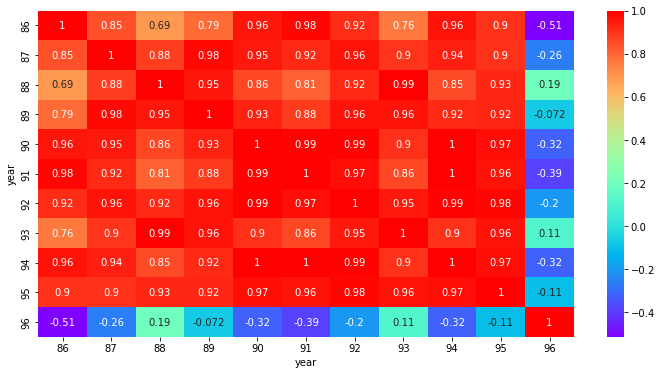

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(data=pivot.corr(),annot=True,cmap="rainbow")
plt.show()

### Lag plot

In [34]:
from pandas.plotting import lag_plot

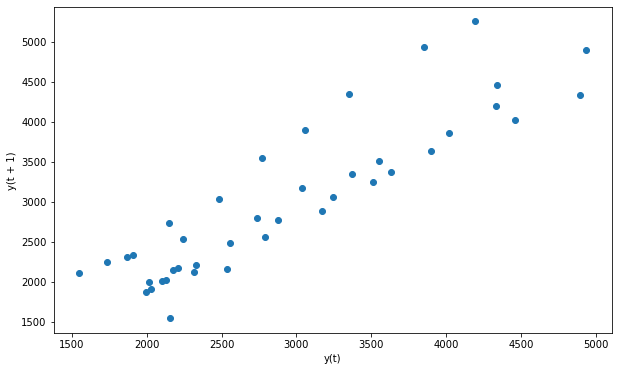

In [35]:
plt.figure(figsize=(10,6))
lag_plot(cocacola_data['Sales'])
plt.show()

### Obs :  the lag plot shows that the Models can be built 

## ACF and PACF plots

### ACF - plot between lags and values of correlation

### PACF - partial auto-correlation function, plot between lags and residuals 

### (Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals)

In [36]:
import statsmodels.graphics.tsaplots as tsa_plots

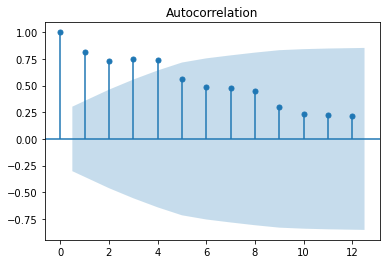

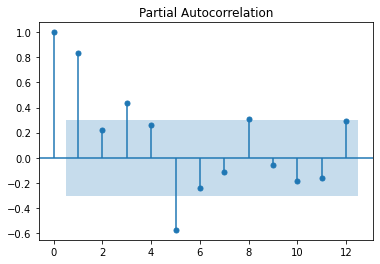

In [37]:
tsa_plots.plot_acf(cocacola_data.Sales,lags=12)
tsa_plots.plot_pacf(cocacola_data.Sales,lags=12)
plt.show()

### Time series decomposition plot

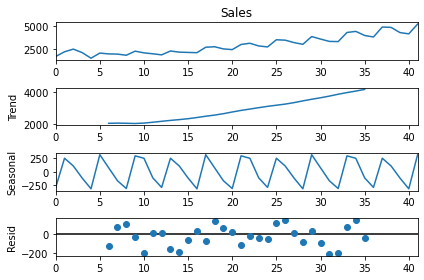

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(cocacola_data['Sales'],period=12)
decompose_ts_add.plot()
plt.show()

### Data splitting

In [39]:
cocacola_data.shape

(42, 12)

In [40]:
train=cocacola_data.head(34)
test=cocacola_data.tail(8)

# Model Building

## Model based Forcasting Techniques

In [41]:
import statsmodels.formula.api as smf 
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error

### Linear model

In [42]:
linear_model = smf.ols('Sales~t',data=train).fit()
linear_pred=linear_model.predict(test['t'])

linear_rms=mean_absolute_percentage_error(test['Sales'],linear_pred)*100
linear_rms

12.375390063893452

####  Brief of the model
1.dependent variable= Sales

2.independent variable= t

3.RMSE matric =  12.37

###  Exponential model

In [43]:
Exp = smf.ols('log_sales~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = mean_absolute_percentage_error(test['log_sales'],pred_Exp)*100
rmse_Exp

1.2094828730178722

####  Brief of the model
1.dependent variable= log_Sales

2.independent variable= t

3.RMSE matric =  1.20

### Quadratic Model

In [44]:
Quad = smf.ols('Sales~t+t_square',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_square"]]))
rmse_Quad = mean_absolute_percentage_error(test['Sales'],pred_Quad)*100
rmse_Quad

9.041132036265461

####  Brief of the model
1.dependent variable= Sales

2.independent variable= t,t_square

3.RMSE matric =  9.04

In [45]:
train.head(1)

,Quarter,Sales,Date,year,month,Dec,Jun,Mar,Sep,t,log_sales,t_square
0,Q1_86,1734.827,1986-03-31,86,Mar,0,0,1,0,1,7.458663,1


### Additive seasonality 

In [46]:
add_sea = smf.ols('Sales~Jun+Dec+Mar+Sep',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Mar','Jun','Sep','Dec']]))
rmse_add_sea = mean_absolute_percentage_error(test['Sales'],pred_add_sea)*100
rmse_add_sea

41.05955404994831

####  Brief of the model
1.dependent variable= Sales

2.independent variable= Jun+Dec+Mar+Sep

3.RMSE matric =  41.05

### Additive Seasonality Quadratic 

In [47]:
add_sea_Quad = smf.ols('Sales~t+t_square+Jun+Dec+Mar+Sep',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Mar','Jun','Sep','Dec','t','t_square']]))
rmse_add_sea_quad = mean_absolute_percentage_error(test['Sales'],pred_add_sea_quad)*100
rmse_add_sea_quad

5.08261673214759

####  Brief of the model
1.dependent variable= Sales

2.independent variable= t+t_square+Jun+Dec+Mar+Sep

3.RMSE matric =  5.08

### Multiplicative Seasonality

In [48]:
Mul_sea = smf.ols('log_sales~Jun+Dec+Mar+Sep',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = mean_absolute_percentage_error(test['log_sales'],pred_Mult_sea)*100
rmse_Mult_sea

6.6192077406473215

####  Brief of the model
1.dependent variable= log_Sales

2.independent variable= Jun+Dec+Mar+Sep

3.RMSE matric =  6.61

### Additive Seasonality Linear 

In [49]:
Lin_Add_sea = smf.ols('Sales~t+Mar+Jun+Sep+Dec',data = train).fit()
pred_Lin_add_sea = pd.Series(Lin_Add_sea.predict(test))
rmse_Lin_add_sea = mean_absolute_percentage_error(test['Sales'],pred_Lin_add_sea)*100
rmse_Lin_add_sea

13.045384150128186

####  Brief of the model
1.dependent variable= Sales

2.independent variable= t+Jun+Dec+Mar+Sep

3.RMSE matric =  13.04

### Multiplicative  Seasonality  linear

In [50]:
Mul_Add_sea = smf.ols('log_sales~t+Mar+Jun+Sep+Dec',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = mean_absolute_percentage_error(test['log_sales'],pred_Mult_add_sea)*100
rmse_Mult_add_sea

1.0821274920166035

####  Brief of the model
1.dependent variable= log_Sales

2.independent variable= Jun+Dec+Mar+Sep+t

3.RMSE matric =  1.08

### Observation:

### In the Model Based Techniques Multiplicative Seasonality linear model is best performing

## Data Driven Forcasting

###  Moving average

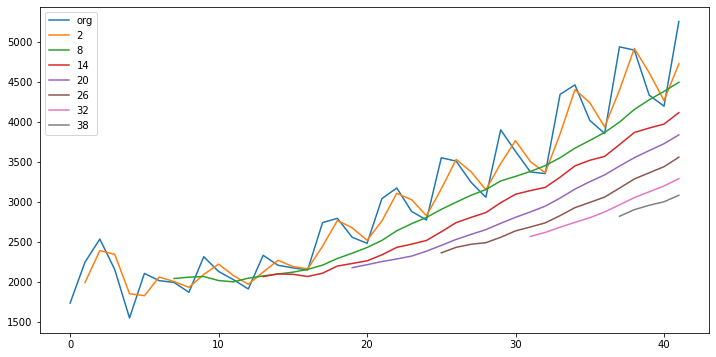

In [51]:
plt.figure(figsize=(12,6))
cocacola_data['Sales'].plot(label="org")
for i in range(2,43,6):
    cocacola_data['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

### Obs : Moving avg not performing well

### Simple Exponential Smoothing model

In [52]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [53]:
ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])

ses_rms=mean_absolute_percentage_error(pred_ses,test['Sales'])*100 
ses_rms

27.297520490923066

#### Brief of the Model
RMSE metric= 27.29

### Holt's  Trend model

In [54]:
# forcast - based on current time, trend
from statsmodels.tsa.holtwinters import Holt

hw_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2) # two levels of smoothening
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
hw_rms=mean_absolute_percentage_error(pred_hw,test['Sales'])*100 
hw_rms

9.285855479488117

#### Brief of the Model
RMSE metric= 9.28

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [55]:
# forcast - based on current time, trend, seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing  # three levels of smoothening

hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])

hw_ma_rms=mean_absolute_percentage_error(pred_hwe_mul_add,test['Sales'])*100 
hw_ma_rms

5.940580334421179

#### Brief of the Model
RMSE metric= 5.94

### Holts winter exponential smoothing with additive seasonality and multiplicative trend

In [56]:
# forcast - based on current time, trend, seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing  # three levels of smoothening

hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="mul",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])

hw_ma_rms=mean_absolute_percentage_error(pred_hwe_mul_add,test['Sales'])*100 
hw_ma_rms

4.478072887837454

#### Brief of the Model
RMSE metric= 4.47

### Holts winter exponential smoothing with additive seasonality and additive trend

In [57]:
hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])

hw_aa_rms=mean_absolute_percentage_error(pred_hwe_add_add,test['Sales'])*100 
hw_aa_rms

4.4456622387596

#### Brief of the Model
RMSE metric= 4.44

### Observation:

### In the Data Driven Forecasting model ->  Holts winter exponential smoothing with additive seasonality and additive   trend  model is best performing 

### ARMA Model (Auto regression and Moving Average)

In [58]:
from statsmodels.tsa.arima_model import ARMA

In [59]:
ARMAmodel = ARMA(endog=train['Sales'],order=(2, 0)) #model with AR=1 and MA=0
ARMAmodel_fit = ARMAmodel.fit()

ARMA_pred = ARMAmodel_fit.predict(start = test.index[0],end = test.index[-1])
ARMA_pred

arma_rms=mean_absolute_percentage_error(ARMA_pred,test['Sales'])*100 
arma_rms

20.157813239249226

#### Brief of the Model
RMSE metric= 20.15

### ARIMA (Autoregressive Integrated Moving Average)

### -> It's only Applicable for Stationary Data 

### understanding the pattern

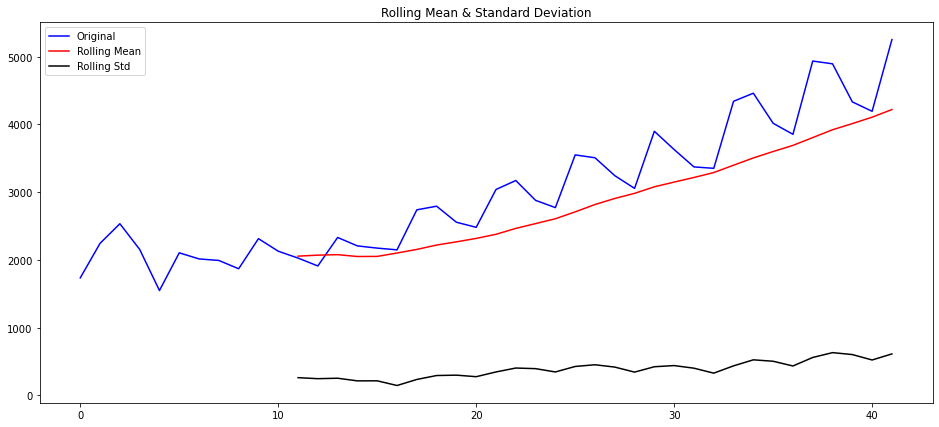

In [60]:
rolLmean = cocacola_data['Sales'].rolling(12).mean() # 12 entries
rolLstd = cocacola_data['Sales'].rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(cocacola_data['Sales'], color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### Transformation

### to transform to stationary from non-stationary

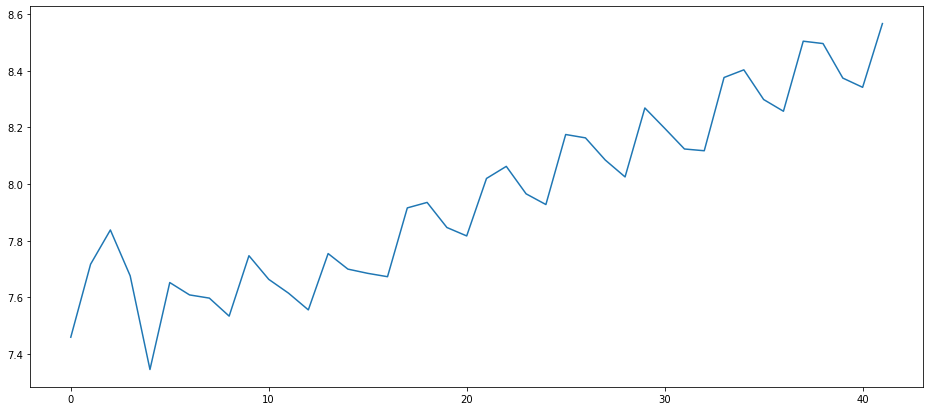

In [61]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(cocacola_data['Sales'])#to transform to stationary from non-stationary
plt.plot(ts_log)

### Obs :  Data is not-stationary

### Using Differencing method to achieve Linearity

### Differencing

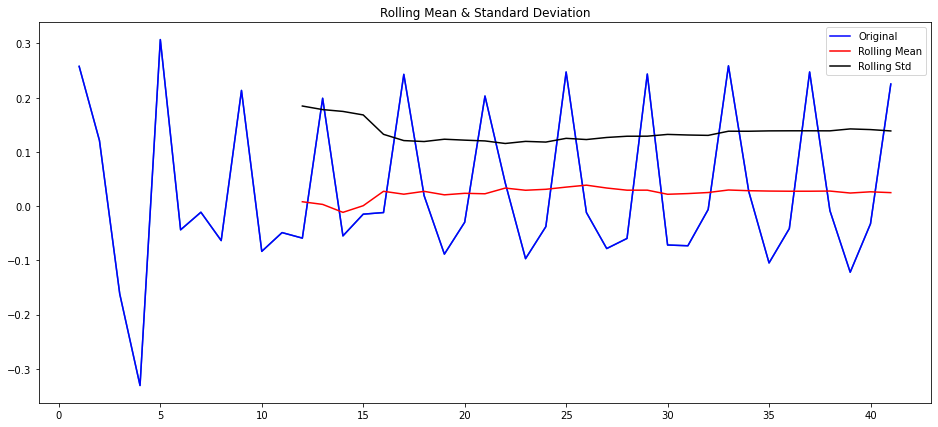

In [62]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift(periods=1) # I will shift the time series by 1 and subtract from the original TS.
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()

#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### ACF and PACF plots

In [63]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=12)
lag_pacf = pacf(ts_log_diff, nlags=12)

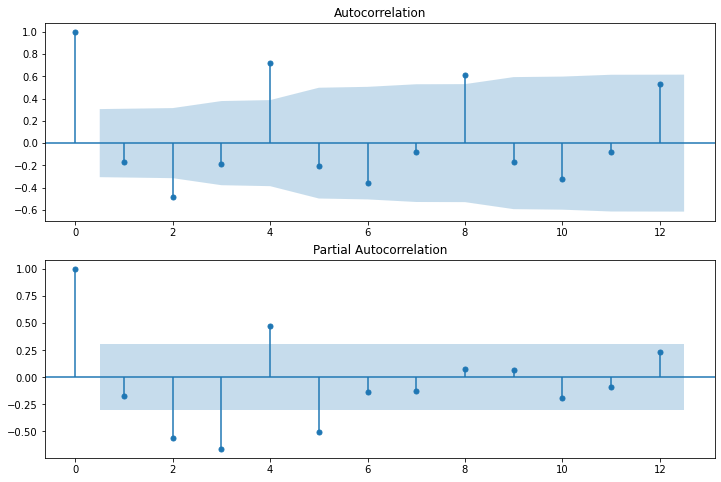

In [64]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=12,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=12,ax=ax2)

### ACF - plot between lags and values of correlation

### PACF - partial auto-correlation function, plot between lags and residuals 

### (Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals)

### Lets Tweak the variables of the ARIMA model

In [65]:
import itertools
p = range(0,5) #AR order
d = range(0,5) #Shift
q = range(0,5) #MA order
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [66]:
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    try:
        model_arima = ARIMA(train['Sales'],order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 543.137928378293
(0, 0, 1) 526.9896631421419
(0, 0, 2) 504.12956803232134
(0, 0, 3) 523.5365504043402
(0, 0, 4) 500.75202422071266
(0, 1, 0) 490.0493835682443
(0, 1, 1) 482.1400960204156
(0, 1, 2) 483.0940287722885
(0, 1, 3) 476.80473950121745
(0, 1, 4) 463.6248884364144
(0, 2, 0) 500.05218190031087
(0, 2, 1) 481.3953171026284
(0, 2, 2) 471.9610845408697
(0, 2, 3) 473.4649702050532
(0, 2, 4) 468.1258406804993
(1, 0, 0) 508.6678906900626
(1, 0, 1) 506.46915637438724
(1, 0, 2) 507.40142448285764
(1, 0, 3) 685.5543264860069
(1, 0, 4) 485.189528788861
(1, 1, 0) 491.03472386797034
(1, 1, 1) 483.86020989838096
(1, 1, 2) 484.5814847254772
(1, 1, 4) 465.3483007523723
(1, 2, 0) 498.6111052215424
(1, 2, 1) 482.6468096873974
(1, 2, 2) 472.8921932324972
(1, 2, 4) 462.65697963104515
(2, 0, 0) 510.2363341827286
(2, 0, 1) 508.2900789136923
(2, 0, 2) 499.8266558607645
(2, 0, 3) 504.5255461862682
(2, 1, 0) 480.3546308167279
(2, 1, 1) 475.66707325450574
(2, 2, 0) 494.3366357508414
(2, 2, 1) 47

In [67]:
ARIMAmodel = ARIMA(train['Sales'], order=(4, 2, 2)) #notice p,d and q value here
ARIMA_model_fit = ARIMAmodel.fit()

ARIMA_pred = ARIMA_model_fit.predict(start = test.index[0],end = test.index[-1],typ='levels')

arima_rms=mean_absolute_percentage_error(ARIMA_pred,test['Sales'])*100
arima_rms

4.99102371071765

### Obs : performs well 

#### Forecasting wuth ARIMA model  -> for next 12 Months

In [78]:
pd.DataFrame(ARIMA_model_fit.forecast(12)[0])

,0
0,4056.370544
1,3846.464015
2,3943.286445
3,4869.545218
4,4533.051838
5,4394.576283
6,4598.480078
7,5455.321433
8,5084.221518
9,5026.163672


## From the above analysis

###  Multiplicative  Seasonality linear  Model performs well

## Final Model

### Training with Complete data

In [68]:
Mul_Add_sea = smf.ols('log_sales~t+Mar+Jun+Sep+Dec',data = cocacola_data).fit()

In [69]:
cocacola_data.head(3)

,Quarter,Sales,Date,year,month,Dec,Jun,Mar,Sep,t,log_sales,t_square
0,Q1_86,1734.827000,1986-03-31,86,Mar,0,0,1,0,1,7.458663,1
1,Q2_86,2244.960999,1986-06-30,86,Jun,0,1,0,0,2,7.716443,4
2,Q3_86,2533.804993,1986-09-30,86,Sep,0,0,0,1,3,7.837477,9


In [70]:
forecasting_data=pd.read_excel("./TSM_forecast.xlsx")
forecasting_data

,Quarter,Sales,Date,year,month,Dec,Jun,Mar,Sep,t,log_sales,t_square
0,Q3_96,NaN,31-06-1996,96,Sep,0,0,0,1,43,NaN,1849
1,Q4_96,NaN,1996-12-31 00:00:00,96,Dec,1,0,0,0,44,NaN,1936
2,Q1_97,NaN,1997-03-31 00:00:00,97,Mar,0,0,1,0,45,NaN,2025
3,Q2_97,NaN,31-06-1997,97,Jun,0,1,0,0,46,NaN,2116
4,Q3_97,NaN,31-09-1997,97,Sep,0,0,0,1,47,NaN,2209
5,Q4_97,NaN,1997-12-31 00:00:00,97,Dec,1,0,0,0,48,NaN,2304
6,Q1_98,NaN,1998-03-31 00:00:00,98,Mar,0,0,1,0,49,NaN,2401
7,Q2_98,NaN,31-06-1998,98,Jun,0,1,0,0,50,NaN,2500
8,Q3_98,NaN,31-09-1998,98,Sep,0,0,0,1,51,NaN,2601
9,Q4_98,NaN,1998-12-31 00:00:00,98,Dec,1,0,0,0,52,NaN,2704


In [71]:
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(forecasting_data))
pred_Mult_add_sea

0    8.538013
1    8.457938
2    8.402577
3    8.643100
4    8.634681
5    8.554607
6    8.499246
7    8.739769
8    8.731350
9    8.651275
dtype: float64

In [72]:
forecasting_data["Forecasted_sales"]=pred_Mult_add_sea

In [73]:
forecasting_data

,Quarter,Sales,Date,year,month,Dec,Jun,Mar,Sep,t,log_sales,t_square,Forecasted_sales
0,Q3_96,NaN,31-06-1996,96,Sep,0,0,0,1,43,NaN,1849,8.538013
1,Q4_96,NaN,1996-12-31 00:00:00,96,Dec,1,0,0,0,44,NaN,1936,8.457938
2,Q1_97,NaN,1997-03-31 00:00:00,97,Mar,0,0,1,0,45,NaN,2025,8.402577
3,Q2_97,NaN,31-06-1997,97,Jun,0,1,0,0,46,NaN,2116,8.643100
4,Q3_97,NaN,31-09-1997,97,Sep,0,0,0,1,47,NaN,2209,8.634681
5,Q4_97,NaN,1997-12-31 00:00:00,97,Dec,1,0,0,0,48,NaN,2304,8.554607
6,Q1_98,NaN,1998-03-31 00:00:00,98,Mar,0,0,1,0,49,NaN,2401,8.499246
7,Q2_98,NaN,31-06-1998,98,Jun,0,1,0,0,50,NaN,2500,8.739769
8,Q3_98,NaN,31-09-1998,98,Sep,0,0,0,1,51,NaN,2601,8.731350
9,Q4_98,NaN,1998-12-31 00:00:00,98,Dec,1,0,0,0,52,NaN,2704,8.651275


In [74]:
cocacola_data_1=cocacola_data.copy()
cocacola_data_1.head(2)

,Quarter,Sales,Date,year,month,Dec,Jun,Mar,Sep,t,log_sales,t_square
0,Q1_86,1734.827000,1986-03-31,86,Mar,0,0,1,0,1,7.458663,1
1,Q2_86,2244.960999,1986-06-30,86,Jun,0,1,0,0,2,7.716443,4


In [75]:
complete_data=pd.concat([cocacola_data_1,forecasting_data])
complete_data    

,Quarter,Sales,Date,year,month,Dec,Jun,Mar,Sep,t,log_sales,t_square,Forecasted_sales
0,Q1_86,1734.827000,1986-03-31 00:00:00,86,Mar,0,0,1,0,1,7.458663,1,NaN
1,Q2_86,2244.960999,1986-06-30 00:00:00,86,Jun,0,1,0,0,2,7.716443,4,NaN
2,Q3_86,2533.804993,1986-09-30 00:00:00,86,Sep,0,0,0,1,3,7.837477,9,NaN
3,Q4_86,2154.962997,1986-12-31 00:00:00,86,Dec,1,0,0,0,4,7.675529,16,NaN
4,Q1_87,1547.818996,1987-03-31 00:00:00,87,Mar,0,0,1,0,5,7.344602,25,NaN
5,Q2_87,2104.411995,1987-06-30 00:00:00,87,Jun,0,1,0,0,6,7.651791,36,NaN
6,Q3_87,2014.362999,1987-09-30 00:00:00,87,Sep,0,0,0,1,7,7.608058,49,NaN
7,Q4_87,1991.746998,1987-12-31 00:00:00,87,Dec,1,0,0,0,8,7.596767,64,NaN
8,Q1_88,1869.049999,1988-03-31 00:00:00,88,Mar,0,0,1,0,9,7.533186,81,NaN
9,Q2_88,2313.631996,1988-06-30 00:00:00,88,Jun,0,1,0,0,10,7.746574,100,NaN


## Forecasting(Plots of sales  and  forcasted sales)

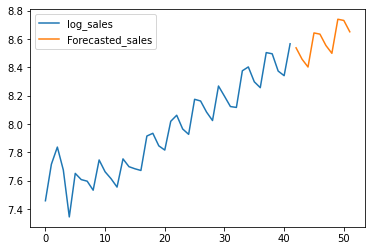

In [76]:
complete_data[["log_sales","Forecasted_sales"]].reset_index(drop=True).plot()
plt.show()